In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:

# ３枚の画像ファイルを読み込む
img_fn = ["imgs/hdr-1.jpg", "imgs/hdr-2.jpg", "imgs/hdr-3.jpg"]
img_list = [cv2.imread(fn) for fn in img_fn]


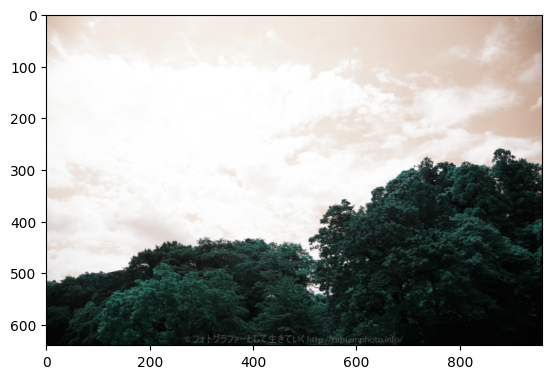

In [13]:
img_list[0] = cv2.resize(img_list[0], (960, 640))
plt.imshow(img_list[0])

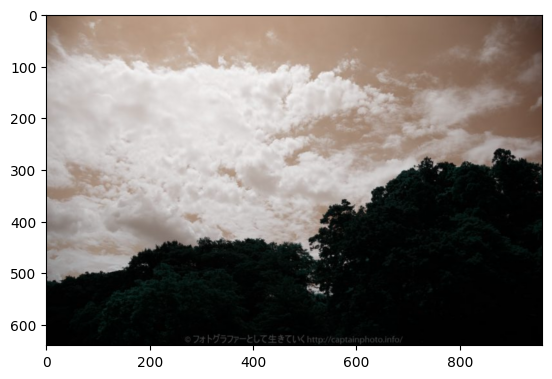

In [14]:
img_list[1] = cv2.resize(img_list[1], (960, 640))
plt.imshow(img_list[1])

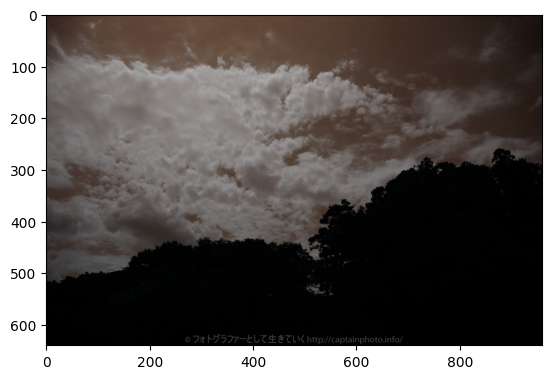

In [15]:
img_list[2] = cv2.resize(img_list[2], (960, 640))
plt.imshow(img_list[2])

In [25]:
# ３枚の画像に対して露出時間をセット
exposure_times = np.array([15, 5, 3], dtype=np.float32)


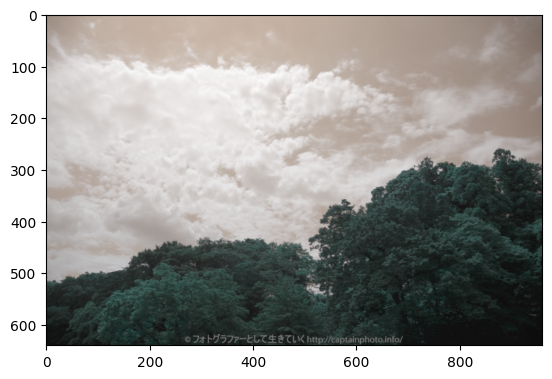

In [26]:

# Debevec法によるHDR合成
merge_debvec = cv2.createMergeDebevec()
hdr_debvec = merge_debvec.process(img_list, times=exposure_times.copy())
tonemap1 = cv2.createTonemap(gamma=2.2)
res_debvec = tonemap1.process(hdr_debvec.copy())

# 8ビットデータに変換
res_debvec_8bit = np.clip(res_debvec*255, 0, 255).astype('uint8')
plt.imshow(res_debvec_8bit)

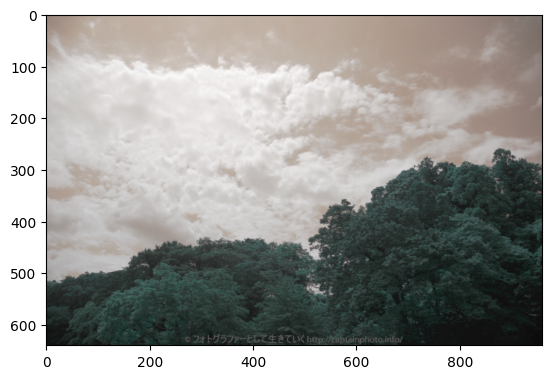

In [27]:

# Robertson法によるHDR合成
merge_robertson = cv2.createMergeRobertson()
hdr_robertson = merge_robertson.process(img_list, times=exposure_times.copy())
tonemap2 = cv2.createTonemap(gamma=2.2)
res_robertson = tonemap2.process(hdr_robertson.copy())

# 8ビットデータに変換
res_robertson_8bit = np.clip(res_robertson*255, 0, 255).astype('uint8')
plt.imshow(res_robertson_8bit)

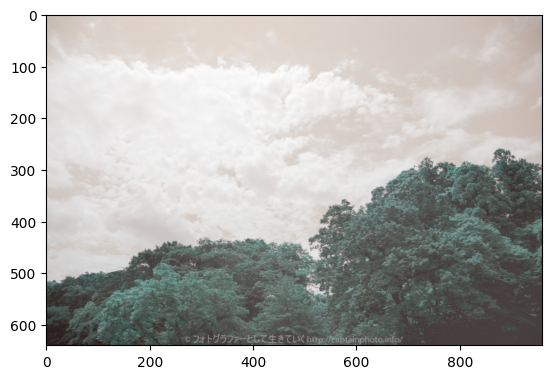

In [30]:

# Mertens法によるHDR合成
merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img_list)
tonemap2 = cv2.createTonemap(gamma=2.2)
res_mertens = tonemap2.process(res_mertens.copy())

# 8ビットデータに変換
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
plt.imshow(res_mertens_8bit)
